### Data description

CareerVillage.org has provided several years of anonymized data and each file comes from a table in their database.

answers.csv: Answers are what this is all about! Answers get posted in response to questions. Answers can only be posted by users who are registered as Professionals. However, if someone has changed their registration type after joining, they may show up as the author of an Answer even if they are no longer a Professional.

comments.csv: Comments can be made on Answers or Questions. We refer to whichever the comment is posted to as the "parent" of that comment. Comments can be posted by any type of user. Our favorite comments tend to have "Thank you" in them :)

emails.csv: Each email corresponds to one specific email to one specific recipient. The frequency_level refers to the type of email template which includes immediate emails sent right after a question is asked, daily digests, and weekly digests.

group_memberships.csv: Any type of user can join any group. There are only a handful of groups so far.

groups.csv: Each group has a "type". For privacy reasons we have to leave the group names off.

matches.csv: Each row tells you which questions were included in emails. If an email contains only one question, that email's ID will show up here only once. If an email contains 10 questions, that email's ID would show up here 10 times.

professionals.csv: We call our volunteers "Professionals", but we might as well call them Superheroes. They're the grown ups who volunteer their time to answer questions on the site.

questions.csv: Questions get posted by students. Sometimes they're very advanced. Sometimes they're just getting started. It's all fair game, as long as it's relevant to the student's future professional success.

school_memberships.csv: Just like group_memberships, but for schools instead.

students.csv: Students are the most important people on CareerVillage.org. They tend to range in age from about 14 to 24. They're all over the world, and they're the reason we exist!

tag_questions.csv: Every question can be hashtagged. We track the hashtag-to-question pairings, and put them into this file.

tag_users.csv: Users of any type can follow a hashtag. This shows you which hashtags each user follows.

tags.csv: Each tag gets a name.

question_scores.csv: "Hearts" scores for each question.

answer_scores.csv: "Hearts" scores for each answer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
### function for reading file

def read_file(filename):
    dataframe = pd.read_csv(filename)
    print("The shape of dataframe:", dataframe.shape)
    return dataframe

### Loading all the data files

In [67]:
answers_df = read_file('answers.csv')

The shape of dataframe: (51123, 5)


In [68]:
comments_df = read_file('comments.csv')

The shape of dataframe: (14966, 5)


In [69]:
questions_df = read_file('questions.csv')

The shape of dataframe: (23931, 5)


In [70]:
students_df = read_file('students.csv')

The shape of dataframe: (30971, 3)


In [71]:
professionals_df = read_file('professionals.csv')

The shape of dataframe: (28152, 5)


In [72]:
tags_df = read_file('tags.csv')

The shape of dataframe: (16269, 2)


In [73]:
group_memberships = read_file('group_memberships.csv')

The shape of dataframe: (1038, 2)


In [74]:
tag_questions_df = read_file('tag_questions.csv')

The shape of dataframe: (76553, 2)


In [75]:
tag_users_df = read_file('tag_users.csv')

The shape of dataframe: (136663, 2)


In [76]:
question_scores_df = read_file('question_scores.csv')

The shape of dataframe: (23928, 2)


In [77]:
answer_scores_df = read_file('answer_scores.csv')

The shape of dataframe: (51138, 2)


In [78]:
emails_df = read_file('emails.csv')

The shape of dataframe: (1850101, 4)


In [79]:
matches_df = read_file('matches.csv')

The shape of dataframe: (4316275, 2)


In [80]:
groups_df = read_file('groups.csv')

The shape of dataframe: (49, 2)


In [81]:
school_memberships_df = read_file('school_memberships.csv')

The shape of dataframe: (5638, 2)


In [82]:
tag_questions_df.head()

,tag_questions_tag_id,tag_questions_question_id
0,28930,cb43ebee01364c68ac61d347a393ae39
1,28930,47f55e85ce944242a5a347ab85a8ffb4
2,28930,ccc30a033a0f4dfdb2eb987012f25792
3,28930,e30b274e48d741f7bf50eb5e7171a3c0
4,28930,3d22742052df4989b311b4195cbb0f1a


In [83]:
tags_df.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [84]:
tag_users_df.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


### Lets start by examining the most relevant dataframes: Question, professionals, answer and tags 

### Check if question has more than one answer: We do see more number of unique answers than unique questions id

In [85]:
answers_df.describe(include=['O'])

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
count,51123,51123,51123,51123,51122
unique,51123,10169,23110,51062,50401
top,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,2017-05-10 18:17:42 UTC+0000,"<p>&lt;span style=""background-color: transpare..."
freq,1,1710,58,2,103


## Examine Question data frame

In [86]:
questions_df.describe(include=['O'])

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
count,23931,23931,23931,23931,23931
unique,23931,12329,23869,23739,23681
top,8b48db56a1e64237bd9f86d0bb266e21,2fe767de78fa4dfd83f0021cf7712064,2019-01-15 16:54:41 UTC+0000,How do I become an IAS officer?,Accounting student at Towson university #acco...
freq,1,93,2,6,16


### Create new features from answer and questions dataframe


    1) Number of answers for each question
    2) Time difference between question asked and first answer posted
    3) No of tags for each questions
    4) List of tags for each question
    5) Heart score for each question

### Number of answers for each question

In [87]:
answers_count = answers_df.groupby('answers_question_id')['answers_id'].count()

In [88]:
df = pd.DataFrame(answers_count.rename('count')).reset_index()
questions_df['questions_answer_count'] = questions_df.merge(df, how = 'left' , left_on = 'questions_id', right_on = 'answers_question_id')['count'].fillna(0).astype(int)

In [89]:
questions_df.questions_answer_count.value_counts()

1     10067
2      6071
3      3160
4      2318
0       821
5       718
6       299
7       149
8        94
9        56
10       49
11       26
12       25
13       16
15       13
14       12
17        5
18        4
16        4
24        3
22        3
21        3
20        3
19        3
31        2
26        2
25        1
58        1
43        1
30        1
23        1
Name: questions_answer_count, dtype: int64

### Histogram of number of answers for each question: shows right skwedness with majority of questions with number of answers less than 4

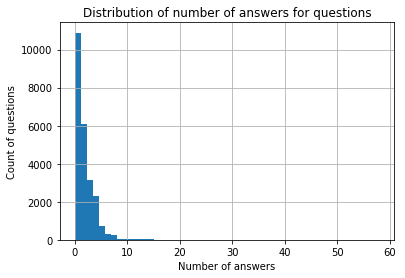

In [90]:
questions_df.questions_answer_count.hist(bins = 50)
plt.title('Distribution of number of answers for questions')
plt.xlabel('Number of answers')
plt.ylabel('Count of questions')
plt.show()

In [91]:
questions_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26 UTC+0000,Teacher career question,What is a maths teacher? what is a ma...,1
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25 UTC+0000,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38 UTC+0000,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32 UTC+0000,To become a specialist in business management...,i hear business management is a hard way to ge...,2
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54 UTC+0000,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2


### Time difference between question posted and first answer posted

In [92]:
## function to convert timestamp

def datetime_covert(df,column):
    df[column] = pd.to_datetime(df[column], infer_datetime_format= True)
    return df

In [93]:
### Convert time stamp for dataframes with date information

questions_df = datetime_covert(questions_df, 'questions_date_added')
answers_df = datetime_covert(answers_df, 'answers_date_added')
professionals_df = datetime_covert(professionals_df,'professionals_date_joined')
students_df = datetime_covert(students_df,'students_date_joined')
emails_df = datetime_covert(emails_df,'emails_date_sent')
comments_df = datetime_covert(comments_df,'comments_date_added')

### Find minimum answer date for each question to calculate time taken to get first for each question

In [94]:
## group by questions id and find the min of answer date to know the first answer date for each question

df = answers_df.groupby('answers_question_id')['answers_date_added'].min()
df = pd.DataFrame(df.rename('first_answer')).reset_index()

In [95]:
### Merge the created dataframe to question datafame and calculate the time difference between time question asked and first answer

questions_df['first_answer_time'] = questions_df.merge(df, how = 'left' , left_on = 'questions_id', right_on = 'answers_question_id')['first_answer']

questions_df['time_to_get_first_answer'] = questions_df['first_answer_time'] - questions_df['questions_date_added']

### impute questions with no answers with value = 2000

questions_df['days_to_get_first_answer'] = questions_df['time_to_get_first_answer'].dt.days.fillna(2000).astype(int)

In [96]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 9 columns):
questions_id                23931 non-null object
questions_author_id         23931 non-null object
questions_date_added        23931 non-null datetime64[ns]
questions_title             23931 non-null object
questions_body              23931 non-null object
questions_answer_count      23931 non-null int32
first_answer_time           23110 non-null datetime64[ns]
time_to_get_first_answer    23110 non-null timedelta64[ns]
days_to_get_first_answer    23931 non-null int32
dtypes: datetime64[ns](2), int32(2), object(4), timedelta64[ns](1)
memory usage: 1.5+ MB


### 821 questions have not got any responses and would be considered as a part of test set

In [107]:
questions_df.days_to_get_first_answer.value_counts()

0       8884
1       1752
2        911
2000     821
3        612
4        413
5        329
6        264
7        219
8        196
9        180
10       155
11       155
12       153
18       141
17       139
14       138
19       131
13       131
20       130
16       128
15       115
27       111
23       109
28        99
22        97
21        96
24        87
25        86
26        86
        ... 
275        1
479        1
882        1
850        1
802        1
674        1
724        1
820        1
565        1
629        1
599        1
583        1
750        1
814        1
838        1
790        1
774        1
758        1
662        1
646        1
630        1
614        1
598        1
1692       1
438        1
326        1
885        1
677        1
645        1
863        1
Name: days_to_get_first_answer, Length: 728, dtype: int64

### Histogram for number of days to get first answer

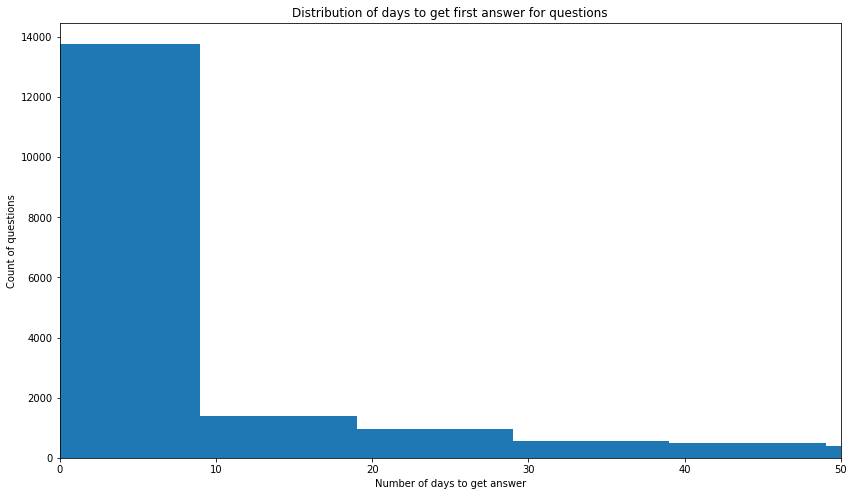

In [130]:
plt.figure(figsize=(14,8))
plt.hist(questions_df.days_to_get_first_answer, bins= 200)
plt.title('Distribution of days to get first answer for questions')
plt.xlabel('Number of days to get answer')
plt.ylabel('Count of questions')
plt.xlim(0,50)
plt.show()

### The above plot shows that majority of questions approx 14000 questions out of 23000 got responses in less than 20 days

### Create list of tags for each question and count number of tags

In [131]:
## merge tag names to question ids

questions_id_tag_names = tag_questions_df.merge(tags_df, how = 'left' , left_on = 'tag_questions_tag_id', right_on = 'tags_tag_id')

In [132]:
questions_id_tag_names.head()

,tag_questions_tag_id,tag_questions_question_id,tags_tag_id,tags_tag_name
0,28930,cb43ebee01364c68ac61d347a393ae39,28930,minor
1,28930,47f55e85ce944242a5a347ab85a8ffb4,28930,minor
2,28930,ccc30a033a0f4dfdb2eb987012f25792,28930,minor
3,28930,e30b274e48d741f7bf50eb5e7171a3c0,28930,minor
4,28930,3d22742052df4989b311b4195cbb0f1a,28930,minor


### Most of the questions have college and career tags: It means that most of the student questions are general and can be answered by any professional irrespective of their background

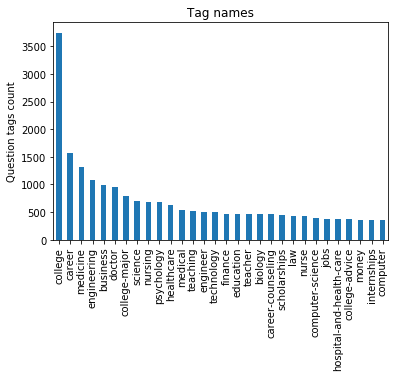

In [133]:
questions_id_tag_names.tags_tag_name.value_counts()[:30].plot.bar()
plt.title('Tag names')
plt.ylabel('Question tags count')
plt.show()

In [134]:
### Concatenate tag names for each question id

foo = lambda a: ", ".join(a)

questions_id_tag_names = questions_id_tag_names.groupby(by='tag_questions_question_id').agg({'tags_tag_name': foo}).reset_index()

### Count of tags for each question id

In [135]:
questions_id_tag_names['question_tags_count'] = questions_id_tag_names.tags_tag_name.apply(lambda x: len(x.split(',')))

In [136]:
questions_id_tag_names.head()

,tag_questions_question_id,tags_tag_name,question_tags_count
0,0003e7bf48f24b5c985f8fce96e611f3,"internship, technology, high-school, informati...",6
1,0006609dd4da40dcaa5a83e0499aba14,"psychology, law",2
2,000af224bc2f4e94a19f8b62ba279cc4,"biology, marine",2
3,000b30fb534b41f7b716fa9ebf9c3f35,"teaching, exercise-science, school, exercise",4
4,0018752e44b44e26bb74a0a43232b4d6,"math, puremathematics",2


In [137]:
questions_df = questions_df.merge(questions_id_tag_names, how ='left', left_on = 'questions_id', right_on = 'tag_questions_question_id')

### Distribution of number of tags for each question: More than 15000 questions have less than 5 tags

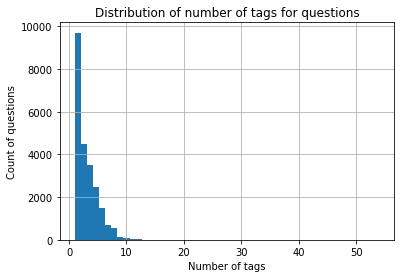

In [147]:
# plt.figure(figsize=(14,8))
questions_df.question_tags_count.hist(bins = 50)
plt.title('Distribution of number of tags for questions')
plt.xlabel('Number of tags')
plt.ylabel('Count of questions')
# plt.xlim(0,15)
plt.show()

In [140]:
questions_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tag_questions_question_id,tags_tag_name,question_tags_count
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,332a511f1569444485cf7a7a556a5e54,"lecture, college, professor",3.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,eb80205482e4424cad8f16bc25aa2d9c,"military, army",2.0
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,4ec31632938a40b98909416bdd0decff,"overseas, working-abroad",2.0
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,2f6a9a99d9b24e5baa50d40d0ba50a75,"networking, business",2.0
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2,2017-09-29 18:50:11,28 days 16:13:17,28,5af8880460c141dbb02971a1a8369529,"scholarships, highschoolsenior, college, first...",4.0


In [141]:
questions_df.question_tags_count.value_counts()

1.0     5056
2.0     4652
3.0     4510
4.0     3524
5.0     2466
6.0     1480
7.0      713
8.0      574
9.0      133
10.0      63
11.0      28
12.0      17
13.0      13
14.0      10
16.0       7
18.0       6
17.0       5
19.0       5
15.0       5
20.0       4
23.0       3
24.0       2
27.0       2
43.0       1
54.0       1
26.0       1
22.0       1
44.0       1
47.0       1
53.0       1
38.0       1
52.0       1
21.0       1
Name: question_tags_count, dtype: int64

### Heart scores for questions

In [148]:
question_scores_df.head()

,id,score
0,38436aadef3d4b608ad089cf53ab0fe7,5
1,edb8c179c5d64c9cb812a59a32045f55,4
2,333464d7484b43e3866e86096bc4ddb9,6
3,4b995e60b99d4ee18346e893e007cb8f,6
4,f6b9ca94aed04ba28256492708e74f60,6


In [149]:
questions_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tag_questions_question_id,tags_tag_name,question_tags_count
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,332a511f1569444485cf7a7a556a5e54,"lecture, college, professor",3.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,eb80205482e4424cad8f16bc25aa2d9c,"military, army",2.0
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,4ec31632938a40b98909416bdd0decff,"overseas, working-abroad",2.0
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,2f6a9a99d9b24e5baa50d40d0ba50a75,"networking, business",2.0
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2,2017-09-29 18:50:11,28 days 16:13:17,28,5af8880460c141dbb02971a1a8369529,"scholarships, highschoolsenior, college, first...",4.0


In [150]:
### merge questions dataframe to question score df

questions_df = questions_df.merge(question_scores_df, how = 'left', left_on = 'questions_id', right_on = 'id')

In [151]:
## drop repetitive columns

questions_df.drop(['id','tag_questions_question_id'],axis = 1, inplace= True)

### Merge question body and title

In [152]:
questions_df['full_text'] = questions_df['questions_title'] + ' ' + questions_df['questions_body']

questions_df.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tags_tag_name,question_tags_count,score,full_text
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,"lecture, college, professor",3.0,1.0,Teacher career question What is a maths...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",2.0,5.0,I want to become an army officer. What can I d...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,"overseas, working-abroad",2.0,2.0,Will going abroad for your first job increase ...
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,"networking, business",2.0,2.0,To become a specialist in business management...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2,2017-09-29 18:50:11,28 days 16:13:17,28,"scholarships, highschoolsenior, college, first...",4.0,2.0,Are there any scholarships out there for stude...


In [153]:
questions_df.describe(include= ['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name,full_text
count,23931,23931,23931,23931,23288,23931
unique,23931,12329,23739,23681,17743,23887
top,8b48db56a1e64237bd9f86d0bb266e21,2fe767de78fa4dfd83f0021cf7712064,How do I become an IAS officer?,Accounting student at Towson university #acco...,college,Do you like what you do for your job? #career ...
freq,1,93,6,16,224,3


## Examine the professional data frame

### Create new features from the professional and answer dataframe 

    1) Find professionals first activity date
    2) Find professionals last activity date
    3) Time taken to answer first question by the professional
    4) Last question answered by the professional
    5) First comment by professional
    6) Last comment by professional
    7) Number of questions answered by the professional
    8) Number of comments by each professional
    9) Professional heart score
    10) List of professional tags

In [154]:
professionals_df.describe(include= ['O'])

,professionals_id,professionals_location,professionals_industry,professionals_headline
count,28152,25054,25576,26085
unique,28152,2582,2470,22272
top,5b9a933fa51040ab965b93485680657a,"New York, New York",Telecommunications,--
freq,1,1337,3166,325


### Examine the industry of professionals in the data: Most of the professionals are from Telecommunications and IT industry

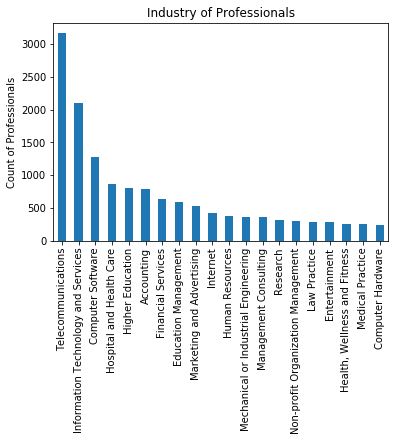

In [155]:
professionals_df.professionals_industry.value_counts()[:20].plot.bar()
plt.title('Industry of Professionals')
plt.ylabel('Count of Professionals')
plt.show()

### Understand the headline of the professionals : Most of the professionals have not provided their headlines

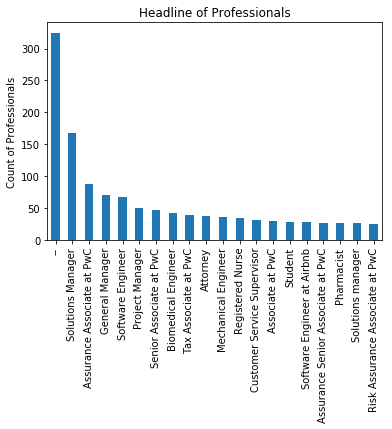

In [156]:
professionals_df.professionals_headline.value_counts()[:20].plot.bar()
plt.title('Headline of Professionals')
plt.ylabel('Count of Professionals')
plt.show()

In [157]:
answers_df.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...


In [158]:
answers_df.describe(include= ['O'])

,answers_id,answers_author_id,answers_question_id,answers_body
count,51123,51123,51123,51122
unique,51123,10169,23110,50401
top,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,"<p>&lt;span style=""background-color: transpare..."
freq,1,1710,58,103


### Find professionals first and last answer date

In [159]:
### first answer date

temp = answers_df.groupby('answers_author_id')['answers_date_added'].min()
df = pd.DataFrame(temp.rename('min')).reset_index()

professionals_df['professional_first_answer_date'] = professionals_df.merge(df, how = 'left' , left_on = 'professionals_id', right_on = 'answers_author_id')['min']


### last answer date

temp = answers_df.groupby('answers_author_id')['answers_date_added'].max()
df = pd.DataFrame(temp.rename('max')).reset_index()

professionals_df['professional_last_answer_date'] = professionals_df.merge(df, how = 'left' , left_on = 'professionals_id', right_on = 'answers_author_id')['max']

### Number of questions answered by professionals

In [160]:
### Number of questions answered by the professional

temp = answers_df.groupby('answers_author_id')['answers_question_id'].count()
df = pd.DataFrame(temp.rename('count')).reset_index()

professionals_df['number_questions_answered'] = professionals_df.merge(df, how = 'left' , left_on = 'professionals_id', right_on = 'answers_author_id')['count'].fillna(0).astype('int')

In [161]:
professionals_df_copy = professionals_df.copy()

professionals_df_copy.number_questions_answered = professionals_df_copy.number_questions_answered.apply(lambda x: 'More than 10' if x > 10 else x)

In [162]:
professionals_df_copy.number_questions_answered.value_counts()

0               18085
1                4225
2                1862
3                1084
More than 10      834
4                 652
5                 478
6                 318
7                 207
8                 157
10                135
9                 115
Name: number_questions_answered, dtype: int64

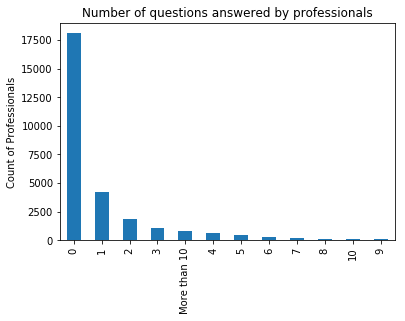

In [163]:
professionals_df_copy.number_questions_answered.value_counts().plot.bar()
plt.title('Number of questions answered by professionals')
plt.ylabel('Count of Professionals')
plt.show()

In [164]:
comments_df.head()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40,"First, you speak to recruiters. They are train..."
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47,Most large universities offer study abroad pro...
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04,"First, I want to put you at ease that the oppo..."
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28,Your question submission was great! I just wan...
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53,Thank you. I'm new to this site. I'm sorry if ...


### Number of comments, first and last comment date for each professional

In [165]:
### Number of comments answered by the professional

temp = comments_df.groupby('comments_author_id')['comments_id'].count()
df = pd.DataFrame(temp.rename('count')).reset_index()

professionals_df['number_comments'] = professionals_df.merge(df, how = 'left' , left_on = 'professionals_id', right_on = 'comments_author_id')['count'].fillna(0).astype('int')


### first comment date for the professional

temp = comments_df.groupby('comments_author_id')['comments_date_added'].min()
professionals_df['date_first_comment'] = pd.merge(professionals_df, pd.DataFrame(temp.rename('first_comment')), left_on='professionals_id', right_index=True, how='left')['first_comment']

### last comment date for the professional

temp = comments_df.groupby('comments_author_id')['comments_date_added'].max()
professionals_df['date_last_comment'] = pd.merge(professionals_df, pd.DataFrame(temp.rename('last_comment')), left_on='professionals_id', right_index=True, how='left')['last_comment']


### Find professionals first and last overall activity date

In [169]:
### Last activity of the professional

professionals_df['date_last_activity'] = professionals_df[['professional_last_answer_date', 'date_last_comment']].max(axis=1)


### First activity of the professional 

professionals_df['date_first_activity'] = professionals_df[['professional_first_answer_date', 'date_first_comment']].min(axis=1)

### Time taken by professional to give first response after joining


In [170]:
## time taken by professional to give first response

professionals_df['time_to_answer_first_question'] = professionals_df['date_first_activity'] - professionals_df['professionals_date_joined']

### Days to answer first question by professional

In [171]:
## number of days taken by professional to give first response after joining career village

professionals_df['days_to_answer_first_question'] = professionals_df['time_to_answer_first_question'].dt.days.fillna(-1).astype(int)

In [172]:
professionals_df_copy = professionals_df.copy()

professionals_df_copy.days_to_answer_first_question = professionals_df_copy.days_to_answer_first_question.apply(lambda x: 'More than 10 days' if x > 10 else x)

### The plot shows most of the professionals approx 17500 have value -1 which shows that they have not answered any question

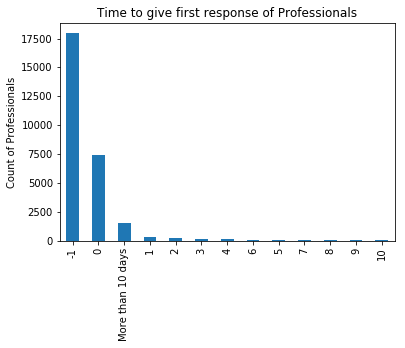

In [173]:
professionals_df_copy.days_to_answer_first_question.value_counts().plot.bar()
plt.title('Time to give first response of Professionals')
plt.ylabel('Count of Professionals')
plt.show()

### Time since last activity for each professional

In [174]:
import datetime

### competition start date assumed at 1st Feb 2019

competition_start_date = datetime.datetime(2019,2,1)
competition_start_date

datetime.datetime(2019, 2, 1, 0, 0)

### Time since last activity is calculated using the time difference between the start date of the competition and last activity of the professional

In [175]:
professionals_df['time_since_last_activity'] = competition_start_date - professionals_df['date_last_activity']

In [176]:
professionals_df.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professional_first_answer_date,professional_last_answer_date,number_questions_answered,number_comments,date_first_comment,date_last_comment,date_last_activity,date_first_activity,time_to_answer_first_question,days_to_answer_first_question,time_since_last_activity
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19,2011-10-05 20:42:09,2011-10-05 20:42:09,1,0,NaT,NaT,2011-10-05 20:42:09,2011-10-05 20:42:09,0 days 00:06:50,0,2675 days 03:17:51
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,2011-10-18 17:39:49,2013-04-04 05:39:18,39,10,2012-02-15 19:53:44,2013-06-07 12:48:14,2013-06-07 12:48:14,2011-10-18 17:39:49,0 days 00:08:23,0,2064 days 11:11:46
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,2012-01-09 05:37:28,2013-03-31 23:55:35,23,3,2011-11-11 18:55:10,2012-01-19 04:18:02,2013-03-31 23:55:35,2011-11-11 18:55:10,1 days 22:15:41,1,2132 days 00:04:25
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT


### Months since last activity of the professional

In [177]:
import math

professionals_df_copy = professionals_df.copy()

professionals_df_copy['months_since_last_activity'] = (professionals_df_copy['time_since_last_activity'].dt.days/30).dropna().apply(lambda x: math.ceil(x)).astype(int)

professionals_df_copy.months_since_last_activity = professionals_df_copy.months_since_last_activity.apply(lambda x: 'more than a year' if x > 12 else x)

### Most of the professionals have not responded to anything since the last one year: This is an important metric for our recommendation system since we do not want to recommend questions to individuals who have not been active for a long time

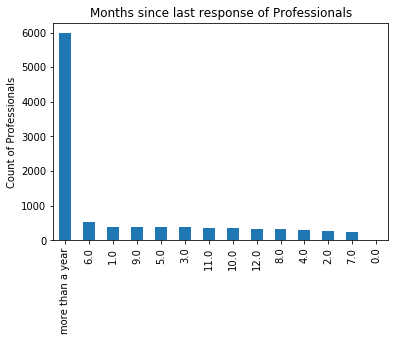

In [178]:
professionals_df_copy.months_since_last_activity.value_counts().plot.bar()
plt.title('Months since last response of Professionals')
plt.ylabel('Count of Professionals')
plt.show()

### Examine hearts score for each answer

In [179]:
answer_scores_df.head()

,id,score
0,7b2bb0fc0d384e298cffa6afde9cf6ab,1
1,7640a6e5d5224c8681cc58de860858f4,5
2,3ce32e236fa9435183b2180fb213375c,2
3,fa30fe4c016043e382c441a7ef743bfb,0
4,71229eb293314c8a9e545057ecc32c93,2


In [180]:
answer_scores_df.describe(include=['O'])

,id
count,51138
unique,51138
top,0c3830a2cec645ef927b3d6a60e184da
freq,1


### Examine answers dataframe

### Days required to answer the question

In [181]:
temp = pd.merge(questions_df, answers_df, left_on='questions_id', right_on='answers_question_id')
answers_df['time_delta_answer'] = (temp['answers_date_added'] - temp['questions_date_added'])
answers_df['time_delta_answer_day'] = answers_df['time_delta_answer'].dt.days

# # Ranking for answers time

# answers['answers_time_rank'] = answers.groupby('answers_question_id')['time_delta_answer'].rank(method='min').astype(int)

### Heart score for answers: Almost 90% of answers have less than 2 heart score

In [182]:
temp = pd.merge(answers_df, answer_scores_df, left_on='answers_id', right_on='id', how='left')
answers_df['answers_hearts_score'] = temp['score'].fillna(0).astype(int)

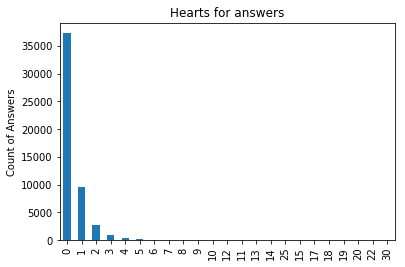

In [183]:
answers_df.answers_hearts_score.value_counts().plot.bar()
plt.title('Hearts for answers')
plt.ylabel('Count of Answers')
plt.show()

### Total Hearts score for each professional

In [184]:
temp = answers_df.groupby('answers_author_id')['answers_hearts_score'].sum()
df = pd.DataFrame(temp.rename('count')).reset_index()

professionals_df['professional_answers_hearts_score'] = professionals_df.merge(df, left_on='professionals_id', how='left', right_on = 'answers_author_id')['count'].fillna(0).astype(int)

### Tag list of the professionals

In [185]:
tag_users_df.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [186]:
tags_df.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [187]:
## merge tag names to user ids

user_id_tag_names = tag_users_df.merge(tags_df, how = 'left' , left_on = 'tag_users_tag_id', right_on = 'tags_tag_id')

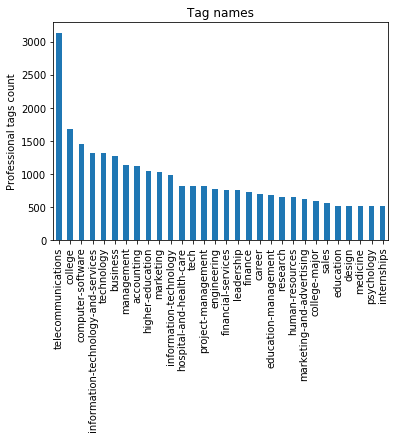

In [188]:
user_id_tag_names.tags_tag_name.value_counts()[:30].plot.bar()
plt.title('Tag names')
plt.ylabel('Professional tags count')
plt.show()

In [189]:
### Concatenate tag names for each user id

foo = lambda a: ", ".join(a)

user_id_tag_names = user_id_tag_names.groupby(by='tag_users_user_id').agg({'tags_tag_name': foo}).reset_index()

In [190]:
### merge user id tag names df to professional df

professionals_df = professionals_df.merge(user_id_tag_names, how ='left', left_on = 'professionals_id', right_on = 'tag_users_user_id')

In [191]:
professionals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28152 entries, 0 to 28151
Data columns (total 19 columns):
professionals_id                     28152 non-null object
professionals_location               25054 non-null object
professionals_industry               25576 non-null object
professionals_headline               26085 non-null object
professionals_date_joined            28152 non-null datetime64[ns]
professional_first_answer_date       10067 non-null datetime64[ns]
professional_last_answer_date        10067 non-null datetime64[ns]
number_questions_answered            28152 non-null int32
number_comments                      28152 non-null int32
date_first_comment                   1474 non-null datetime64[ns]
date_last_comment                    1474 non-null datetime64[ns]
date_last_activity                   10286 non-null datetime64[ns]
date_first_activity                  10286 non-null datetime64[ns]
time_to_answer_first_question        10286 non-null timedelta64[ns]
days

### Feature with professionals hash tags concatenated with industry name

In [192]:
professionals_df['tags_and_industry'] = professionals_df['tags_tag_name'] + ' ' + professionals_df['professionals_industry']

In [193]:
professionals_df.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professional_first_answer_date,professional_last_answer_date,number_questions_answered,number_comments,date_first_comment,date_last_comment,date_last_activity,date_first_activity,time_to_answer_first_question,days_to_answer_first_question,time_since_last_activity,professional_answers_hearts_score,tag_users_user_id,tags_tag_name,tags_and_industry
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19,2011-10-05 20:42:09,2011-10-05 20:42:09,1,0,NaT,NaT,2011-10-05 20:42:09,2011-10-05 20:42:09,0 days 00:06:50,0,2675 days 03:17:51,5,NaN,NaN,NaN
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT,0,NaN,NaN,NaN
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,2011-10-18 17:39:49,2013-04-04 05:39:18,39,10,2012-02-15 19:53:44,2013-06-07 12:48:14,2013-06-07 12:48:14,2011-10-18 17:39:49,0 days 00:08:23,0,2064 days 11:11:46,77,0c673e046d824ec0ad0ebe012a0673e4,"consulting, education, consulting, education, ...",NaN
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,2012-01-09 05:37:28,2013-03-31 23:55:35,23,3,2011-11-11 18:55:10,2012-01-19 04:18:02,2013-03-31 23:55:35,2011-11-11 18:55:10,1 days 22:15:41,1,2132 days 00:04:25,34,NaN,NaN,NaN
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT,0,NaN,NaN,NaN


### Examine emails and matches dataframe

In [194]:
emails_df.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40,email_notification_daily


In [195]:
emails_df.describe(include=['O'])

,emails_recipient_id,emails_frequency_level
count,1850101,1850101
unique,22168,3
top,0079e89bf1544926b98310e81315b9f1,email_notification_daily
freq,3496,1488240


In [196]:
matches_df.head()

,matches_email_id,matches_question_id
0,1721939,332a511f1569444485cf7a7a556a5e54
1,1665388,332a511f1569444485cf7a7a556a5e54
2,1636634,332a511f1569444485cf7a7a556a5e54
3,1635498,332a511f1569444485cf7a7a556a5e54
4,1620298,332a511f1569444485cf7a7a556a5e54


In [197]:
matches_df.describe(include=['O'])

,matches_question_id
count,4316275
unique,21894
top,d9b06cd477a943b9b3821f37d64a1da3
freq,2099


### merge emails to questions dataframe using matches df

In [198]:
emails_response_df = emails_df.merge(matches_df, left_on='emails_id', right_on='matches_email_id', how='inner')

emails_response_df = emails_response_df.merge(questions_df, left_on='matches_question_id', right_on='questions_id', how='inner')

In [199]:
### Merge email response df to answers df

emails_response_df = emails_response_df.merge(answers_df, how='left', right_on=['answers_author_id', 'answers_question_id'], left_on=['emails_recipient_id', 'matches_question_id'])

In [200]:
### drop irrelevant columns in the merged email dataframe

emails_response_df = emails_response_df.drop(['matches_email_id', 'matches_question_id', 'answers_id', 'answers_author_id', 'answers_body', 'answers_question_id','questions_author_id', 'questions_title', 'questions_body', 'full_text'], axis=1)

### Time difference between answer date and email sent & between email sent and question added

In [201]:
emails_response_df['time_diff_answer_email'] = (emails_response_df['answers_date_added'] - emails_response_df['emails_date_sent'])
emails_response_df['time_diff_question_email'] = (emails_response_df['emails_date_sent'] - emails_response_df['questions_date_added'])

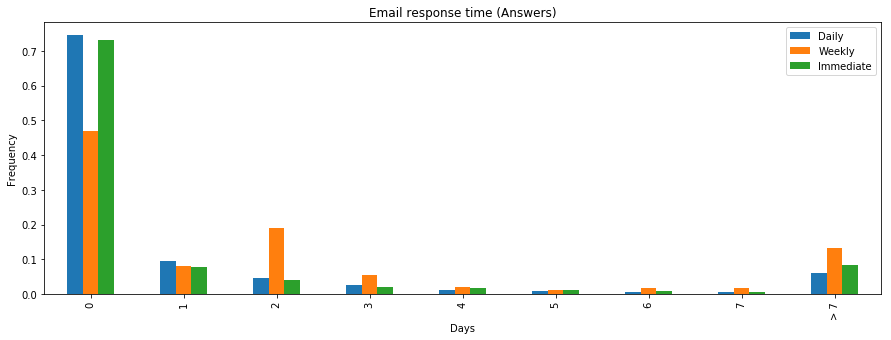

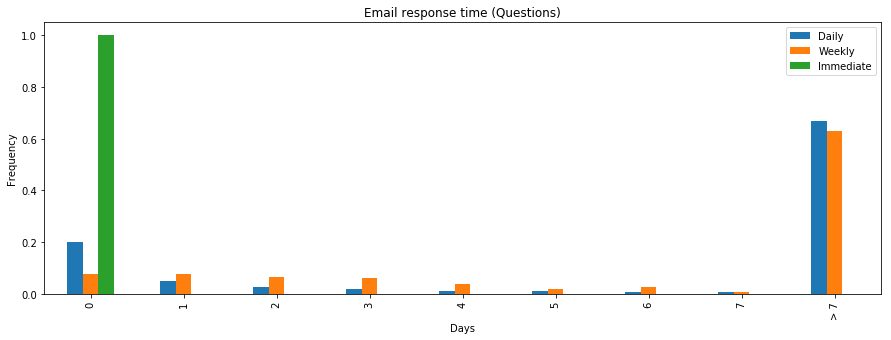

In [258]:
emails_response_df.dropna(inplace= True)

titles = {'time_diff_answer_email':'Answers', 'time_diff_question_email':'Questions'}
for value in ['time_diff_answer_email', 'time_diff_question_email']:
    df = pd.DataFrame()
    
    list_types_email = ['email_notification_daily', 'email_notification_weekly', 'email_notification_immediate']
    for types in list_types_email:
        temp = emails_response_df[emails_response_df['emails_frequency_level'] == types]
        temp = temp[value].dt.days.astype(int)
        temp = temp.groupby(temp).size()/len(temp.index)
        temp = temp.rename(lambda x: 0 if x < 0.0 else x)
        temp = temp.rename(lambda x: x if x <= 7.0 else '> 7')
        temp = temp.groupby(level=0).sum() 
        df = pd.concat([df, temp], axis=1, sort=False)
    df.columns = ['Daily', 'Weekly', 'Immediate']

    df.plot(kind='bar', figsize=(15, 5))
    plt.xlabel('Days')
    plt.ylabel('Frequency')
    plt.title('Email response time ({})'.format(titles[value]))
    plt.show()

### The first plot shows how long it takes for professionals to answer a question after they receive an email notification of a recommended question. This is limited to emails where the specified question was also answered (dropna). When users want to answer a question from an email, they usually use the most recent email. The response time is within the first few days.

### On the second plot with the response time for questions, we can see the emails focusing on older unanswered questions. the immediate emails are focusing on new questions (makes sense)

### Examine professionals with more than 0 comments

In [202]:
professionals_df[professionals_df.number_comments > 0 ].number_questions_answered.value_counts()

1       222
0       219
2       139
3       132
4        99
5        92
6        58
7        44
10       41
8        33
11       28
12       26
9        26
16       20
13       16
21       15
15       14
24       14
18       14
14       13
19       12
20       11
17       10
23        9
25        9
31        8
36        7
22        7
26        7
33        7
       ... 
106       1
133       1
159       1
153       1
99        1
188       1
210       1
217       1
259       1
406       1
711       1
915       1
104       1
84        1
97        1
96        1
91        1
90        1
89        1
79        1
71        1
65        1
62        1
61        1
39        1
58        1
44        1
1112      1
48        1
1710      1
Name: number_questions_answered, Length: 94, dtype: int64

### Since comments can be made a part of professional question matrix, but we are not including them in the matrix because 1) only 1500 professionals have comments.

### Out of 1500 professionals who have commented only 219 have not answered a single question.

### Hence we can disregard comments from consideration

In [203]:
professionals_df.describe(include=['O'])

,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_user_id,tags_tag_name,tags_and_industry
count,28152,25054,25576,26085,25594,25594,24592
unique,28152,2582,2470,22272,25594,13993,13835
top,5b9a933fa51040ab965b93485680657a,"New York, New York",Telecommunications,--,e5677506e91241a78e9087fe909dc937,telecommunications,telecommunications Telecommunications
freq,1,1337,3166,325,1,1260,1244


### Merge questions and answers data frame

In [204]:
questions_and_answers = questions_df.merge(answers_df, how = 'left' , left_on = 'questions_id', right_on = 'answers_question_id')

In [205]:
questions_and_answers.shape

(51944, 21)

In [206]:
questions_and_answers.describe(include= ['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name,full_text,answers_id,answers_author_id,answers_question_id,answers_body
count,51944,51944,51944,51944,50244,51944,51123,51123,51123,51122
unique,23931,12329,23739,23681,17743,23887,51123,10169,23110,50401
top,8eb6ba7af57846acbfec5633e537192a,867e779f9dad4020925e986151ca4be4,What qualities should I possess if I want to b...,Accounting student at Towson university #acco...,college,What qualities should I possess if I want to b...,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,"<p>&lt;span style=""background-color: transpare..."
freq,58,307,58,58,454,58,1,1710,58,103


In [207]:
questions_and_answers.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tags_tag_name,...,score,full_text,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,time_delta_answer,time_delta_answer_day,answers_hearts_score
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,"lecture, college, professor",...,1.0,Teacher career question What is a maths...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...,3 days 08:25:48,3.0,0.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,5.0,I want to become an army officer. What can I d...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...,710 days 21:30:43,710.0,0.0
2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,5.0,I want to become an army officer. What can I d...,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",711 days 09:52:37,711.0,0.0
3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,"overseas, working-abroad",...,2.0,Will going abroad for your first job increase ...,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...,90 days 23:47:09,90.0,0.0
4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,"networking, business",...,2.0,To become a specialist in business management...,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...,42 days 08:02:01,42.0,0.0


### Dataframe of questions with no answers

In [208]:
questions_no_answers = questions_and_answers[questions_and_answers.answers_id.isna()]

In [209]:
questions_no_answers.shape

(821, 21)

In [210]:
questions_no_answers.describe(include=['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name,full_text,answers_id,answers_author_id,answers_question_id,answers_body
count,821,821,821,821,807,821,0.0,0.0,0.0,0.0
unique,821,668,821,817,710,821,0.0,0.0,0.0,0.0
top,c397d186ab8c4715afe2a82ad7b08bc4,8eb0910d7d4141318b1424c0bb7907c9,Scholarships for Students in High School who l...,"I am a US citizen living in Australia, I have ...",scholarships,Where is the most complete list of available s...,NaN,NaN,NaN,NaN
freq,1,21,1,3,14,1,NaN,NaN,NaN,NaN


### Dataframe of questions with answers

In [211]:
questions_with_answers = questions_and_answers[questions_and_answers.answers_id.notna()]

In [212]:
questions_with_answers.shape

(51123, 21)

In [213]:
questions_with_answers.describe(include= ['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name,full_text,answers_id,answers_author_id,answers_question_id,answers_body
count,51123,51123,51123,51123,49437,51123,51123,51123,51123,51122
unique,23110,12111,22922,22873,17190,23067,51123,10169,23110,50401
top,8eb6ba7af57846acbfec5633e537192a,867e779f9dad4020925e986151ca4be4,What qualities should I possess if I want to b...,Accounting student at Towson university #acco...,college,What qualities should I possess if I want to b...,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,"<p>&lt;span style=""background-color: transpare..."
freq,58,306,58,58,451,58,1,1710,58,103


In [214]:
questions_with_answers.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tags_tag_name,...,score,full_text,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body,time_delta_answer,time_delta_answer_day,answers_hearts_score
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,"lecture, college, professor",...,1.0,Teacher career question What is a maths...,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...,3 days 08:25:48,3.0,0.0
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,5.0,I want to become an army officer. What can I d...,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...,710 days 21:30:43,710.0,0.0
2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,5.0,I want to become an army officer. What can I d...,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ...",711 days 09:52:37,711.0,0.0
3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,"overseas, working-abroad",...,2.0,Will going abroad for your first job increase ...,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...,90 days 23:47:09,90.0,0.0
4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,"networking, business",...,2.0,To become a specialist in business management...,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...,42 days 08:02:01,42.0,0.0


### Check for null values in the merged dataframe

In [216]:
questions_with_answers.isnull().sum()

questions_id                   0
questions_author_id            0
questions_date_added           0
questions_title                0
questions_body                 0
questions_answer_count         0
first_answer_time              0
time_to_get_first_answer       0
days_to_get_first_answer       0
tags_tag_name               1686
question_tags_count         1686
score                          8
full_text                      0
answers_id                     0
answers_author_id              0
answers_question_id            0
answers_date_added             0
answers_body                   1
time_delta_answer              0
time_delta_answer_day          0
answers_hearts_score           0
dtype: int64

### Merge professional dataframe to question with answer dataframe

In [217]:
professionals_df.describe(include=['O'])

,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_user_id,tags_tag_name,tags_and_industry
count,28152,25054,25576,26085,25594,25594,24592
unique,28152,2582,2470,22272,25594,13993,13835
top,5b9a933fa51040ab965b93485680657a,"New York, New York",Telecommunications,--,e5677506e91241a78e9087fe909dc937,telecommunications,telecommunications Telecommunications
freq,1,1337,3166,325,1,1260,1244


In [218]:
professionals_df.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined,professional_first_answer_date,professional_last_answer_date,number_questions_answered,number_comments,date_first_comment,date_last_comment,date_last_activity,date_first_activity,time_to_answer_first_question,days_to_answer_first_question,time_since_last_activity,professional_answers_hearts_score,tag_users_user_id,tags_tag_name,tags_and_industry
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19,2011-10-05 20:42:09,2011-10-05 20:42:09,1,0,NaT,NaT,2011-10-05 20:42:09,2011-10-05 20:42:09,0 days 00:06:50,0,2675 days 03:17:51,5,NaN,NaN,NaN
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT,0,NaN,NaN,NaN
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26,2011-10-18 17:39:49,2013-04-04 05:39:18,39,10,2012-02-15 19:53:44,2013-06-07 12:48:14,2013-06-07 12:48:14,2011-10-18 17:39:49,0 days 00:08:23,0,2064 days 11:11:46,77,0c673e046d824ec0ad0ebe012a0673e4,"consulting, education, consulting, education, ...",NaN
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29,2012-01-09 05:37:28,2013-03-31 23:55:35,23,3,2011-11-11 18:55:10,2012-01-19 04:18:02,2013-03-31 23:55:35,2011-11-11 18:55:10,1 days 22:15:41,1,2132 days 00:04:25,34,NaN,NaN,NaN
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44,NaT,NaT,0,0,NaT,NaT,NaT,NaT,NaT,-1,NaT,0,NaN,NaN,NaN


In [219]:
### merge professionals to questions and answers dataframe

questions_with_answers = questions_with_answers.merge(professionals_df, how = 'left', left_on = 'answers_author_id', right_on= 'professionals_id')

### The number of unique professionals ids are less than unique answer author id since there is a possibility answer author was previously a professional but no longer is. Hence we decide to drop rows with null professional ids

In [220]:
questions_with_answers.describe(include=['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name_x,full_text,answers_id,answers_author_id,answers_question_id,answers_body,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_user_id,tags_tag_name_y,tags_and_industry
count,51123,51123,51123,51123,49437,51123,51123,51123,51123,51122,50106,47264,45479,47591,47480,47480,44565
unique,23110,12111,22922,22873,17190,23067,51123,10169,23110,50401,10067,1554,1200,8324,9348,7040,6742
top,8eb6ba7af57846acbfec5633e537192a,867e779f9dad4020925e986151ca4be4,What qualities should I possess if I want to b...,Accounting student at Towson university #acco...,college,What qualities should I possess if I want to b...,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,"<p>&lt;span style=""background-color: transpare...",36ff3b3666df400f956f8335cf53e09e,"Bengaluru, Karnataka, India",Information Technology and Services,Assist with Recognizing and Developing Potential,36ff3b3666df400f956f8335cf53e09e,"career, jobs, engineering, career-choice, coll...","career, jobs, engineering, career-choice, coll..."
freq,58,306,58,58,451,58,1,1710,58,103,1710,2357,3739,1710,1710,1710,1710


In [221]:
## remove null professional id rows in the data

questions_with_answers = questions_with_answers.loc[questions_with_answers.professionals_id.notna()]

In [222]:
questions_with_answers.describe(include= ['O'])

,questions_id,questions_author_id,questions_title,questions_body,tags_tag_name_x,full_text,answers_id,answers_author_id,answers_question_id,answers_body,professionals_id,professionals_location,professionals_industry,professionals_headline,tag_users_user_id,tags_tag_name_y,tags_and_industry
count,50106,50106,50106,50106,48471,50106,50106,50106,50106,50105,50106,47264,45479,47591,47480,47480,44565
unique,22786,12009,22606,22556,17020,22744,50106,10067,22786,49388,10067,1554,1200,8324,9348,7040,6742
top,8eb6ba7af57846acbfec5633e537192a,867e779f9dad4020925e986151ca4be4,What qualities should I possess if I want to b...,Interested to be a management consultant in t...,college,What qualities should I possess if I want to b...,0c3830a2cec645ef927b3d6a60e184da,36ff3b3666df400f956f8335cf53e09e,8eb6ba7af57846acbfec5633e537192a,"<p>&lt;span style=""background-color: transpare...",36ff3b3666df400f956f8335cf53e09e,"Bengaluru, Karnataka, India",Information Technology and Services,Assist with Recognizing and Developing Potential,36ff3b3666df400f956f8335cf53e09e,"career, jobs, engineering, career-choice, coll...","career, jobs, engineering, career-choice, coll..."
freq,58,306,58,58,443,58,1,1710,58,103,1710,2357,3739,1710,1710,1710,1710


In [223]:
questions_with_answers.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tags_tag_name_x,...,date_last_comment,date_last_activity,date_first_activity,time_to_answer_first_question,days_to_answer_first_question,time_since_last_activity,professional_answers_hearts_score,tag_users_user_id,tags_tag_name_y,tags_and_industry
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,"lecture, college, professor",...,2018-09-30 11:34:23,2018-10-10 10:49:06,2015-10-19 21:14:32,0 days 00:17:43,0.0,113 days 13:10:54,431.0,36ff3b3666df400f956f8335cf53e09e,"career, jobs, engineering, career-choice, coll...","career, jobs, engineering, career-choice, coll..."
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,NaT,2018-05-01 14:19:08,2018-05-01 14:19:08,39 days 00:35:40,39.0,275 days 09:40:52,0.0,2aa47af241bf42a4b874c453f0381bd4,"telecommunications, internal-investigations","telecommunications, internal-investigations Te..."
2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,2018-05-20 05:06:34,2018-05-20 05:06:34,2017-11-11 11:32:27,0 days 00:19:31,0.0,256 days 18:53:26,5.0,cbd8f30613a849bf918aed5c010340be,"telecommunications, leadership-and-motivation,...","telecommunications, leadership-and-motivation,..."
3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,"overseas, working-abroad",...,NaT,2018-02-08 15:03:33,2017-05-10 18:08:58,0 days 22:47:25,0.0,357 days 08:56:27,1.0,7e72a630c303442ba92ff00e8ea451df,"insurance, travel, business-travel, man, manag...","insurance, travel, business-travel, man, manag..."
4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,"networking, business",...,NaT,2017-10-13 22:07:33,2017-10-13 20:21:43,0 days 00:23:12,0.0,475 days 01:52:27,1.0,17802d94699140b0a0d2995f30c034c6,"business, marketing, sales, sales-operations, ...","business, marketing, sales, sales-operations, ..."


In [224]:
questions_with_answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50106 entries, 0 to 51122
Data columns (total 41 columns):
questions_id                         50106 non-null object
questions_author_id                  50106 non-null object
questions_date_added                 50106 non-null datetime64[ns]
questions_title                      50106 non-null object
questions_body                       50106 non-null object
questions_answer_count               50106 non-null int32
first_answer_time                    50106 non-null datetime64[ns]
time_to_get_first_answer             50106 non-null timedelta64[ns]
days_to_get_first_answer             50106 non-null int32
tags_tag_name_x                      48471 non-null object
question_tags_count                  48471 non-null float64
score                                50098 non-null float64
full_text                            50106 non-null object
answers_id                           50106 non-null object
answers_author_id                    501

### Time difference between professional join date and answer date

In [225]:
questions_with_answers['time_diff_prof_join_answer_date'] = questions_with_answers['answers_date_added'] - questions_with_answers['professionals_date_joined']

In [226]:
questions_with_answers.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_answer_count,first_answer_time,time_to_get_first_answer,days_to_get_first_answer,tags_tag_name_x,...,date_last_activity,date_first_activity,time_to_answer_first_question,days_to_answer_first_question,time_since_last_activity,professional_answers_hearts_score,tag_users_user_id,tags_tag_name_y,tags_and_industry,time_diff_prof_join_answer_date
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,2016-04-29 19:40:14,3 days 08:25:48,3,"lecture, college, professor",...,2018-10-10 10:49:06,2015-10-19 21:14:32,0 days 00:17:43,0.0,113 days 13:10:54,431.0,36ff3b3666df400f956f8335cf53e09e,"career, jobs, engineering, career-choice, coll...","career, jobs, engineering, career-choice, coll...",192 days 22:43:25
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,2018-05-01 14:19:08,2018-05-01 14:19:08,39 days 00:35:40,39.0,275 days 09:40:52,0.0,2aa47af241bf42a4b874c453f0381bd4,"telecommunications, internal-investigations","telecommunications, internal-investigations Te...",39 days 00:35:40
2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,2,2018-05-01 14:19:08,710 days 21:30:43,710,"military, army",...,2018-05-20 05:06:34,2017-11-11 11:32:27,0 days 00:19:31,0.0,256 days 18:53:26,5.0,cbd8f30613a849bf918aed5c010340be,"telecommunications, leadership-and-motivation,...","telecommunications, leadership-and-motivation,...",171 days 15:28:06
3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,1,2017-05-10 19:00:47,90 days 23:47:09,90,"overseas, working-abroad",...,2018-02-08 15:03:33,2017-05-10 18:08:58,0 days 22:47:25,0.0,357 days 08:56:27,1.0,7e72a630c303442ba92ff00e8ea451df,"insurance, travel, business-travel, man, manag...","insurance, travel, business-travel, man, manag...",0 days 23:39:14
4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,2017-10-12 16:01:44,41 days 01:56:12,41,"networking, business",...,2017-10-13 22:07:33,2017-10-13 20:21:43,0 days 00:23:12,0.0,475 days 01:52:27,1.0,17802d94699140b0a0d2995f30c034c6,"business, marketing, sales, sales-operations, ...","business, marketing, sales, sales-operations, ...",0 days 02:09:02


In [227]:
questions_with_answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50106 entries, 0 to 51122
Data columns (total 42 columns):
questions_id                         50106 non-null object
questions_author_id                  50106 non-null object
questions_date_added                 50106 non-null datetime64[ns]
questions_title                      50106 non-null object
questions_body                       50106 non-null object
questions_answer_count               50106 non-null int32
first_answer_time                    50106 non-null datetime64[ns]
time_to_get_first_answer             50106 non-null timedelta64[ns]
days_to_get_first_answer             50106 non-null int32
tags_tag_name_x                      48471 non-null object
question_tags_count                  48471 non-null float64
score                                50098 non-null float64
full_text                            50106 non-null object
answers_id                           50106 non-null object
answers_author_id                    501

### Find effective time to answer each question based on question date, professional date and answer date

In [228]:
### if professional join date is after question added date, then effective time is answer date added - professional date ended
### if professional join date is before question added date, then effective time is answer date added - question date ended
### Create a new feature effective time to answer the question

questions_with_answers['effective_time_to_answer'] = questions_with_answers.apply(lambda x: x['time_diff_prof_join_answer_date'] if (x['professionals_date_joined'] > x['questions_date_added']) else x['time_delta_answer'], axis = 1)

In [229]:
### convert effective days to answer and time since last activity to days

questions_with_answers['effective_days_to_answer'] = questions_with_answers.effective_time_to_answer.dt.days

questions_with_answers['time_since_last_activity'] = questions_with_answers['time_since_last_activity'].dt.days

### Plot for effective days to answer the questions

In [231]:
temp = questions_with_answers.groupby('questions_id')['effective_days_to_answer'].min()
df = pd.DataFrame(temp.reset_index())

# plt.title('Tag names')
# plt.ylabel('Professional tags count')
# plt.show()

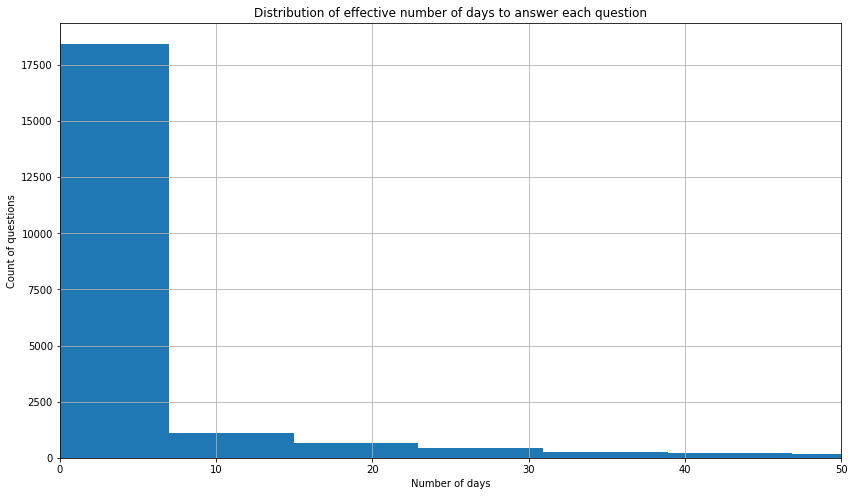

In [240]:
plt.figure(figsize=(14,8))
df.effective_days_to_answer.hist(bins = 100)
plt.title('Distribution of effective number of days to answer each question')
plt.xlabel('Number of days')
plt.ylabel('Count of questions')
plt.xlim(0,50)
plt.show()

### The above plot shows that the effective number of days to get an answer to approx 18500 questions is less than a week

### Find score based on effective days to answer and time since last activity

In [241]:
questions_with_answers['effective_days_to_answer_score'] = 1/np.log10(10 + questions_with_answers['effective_days_to_answer'])

questions_with_answers['time_since_last_activity_score'] = 1/np.log10(10 + questions_with_answers['time_since_last_activity'])

### Plot for percentage of user activity over different time frame

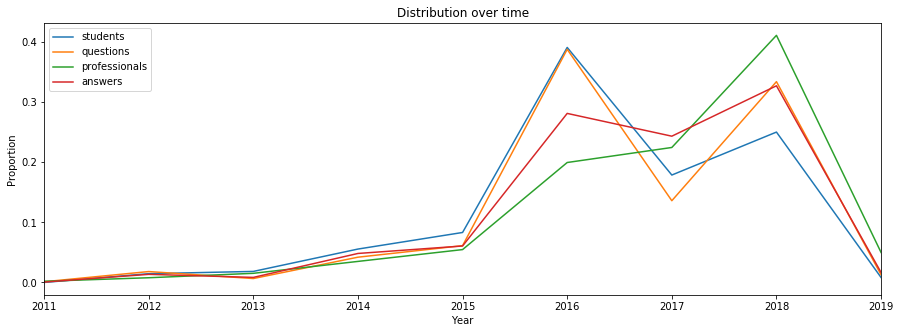

In [242]:
plt_professionals = (professionals_df.groupby([professionals_df['professionals_date_joined'].dt.year]).size()/len(professionals_df.index))
plt_students = (students_df.groupby([students_df['students_date_joined'].dt.year]).size()/len(students_df.index))
plt_questions = (questions_df.groupby([questions_df['questions_date_added'].dt.year]).size()/len(questions_df.index))
plt_answers = (answers_df.groupby([answers_df['answers_date_added'].dt.year]).size()/len(answers_df.index))


plt_data = pd.DataFrame({'students':plt_students,
                         'questions': plt_questions,
                         'professionals':plt_professionals,
                        'answers':plt_answers})
plt_data.plot(figsize=(15, 5))
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Distribution over time')
plt.show()

### Examine students data frame

In [243]:
students_df.describe(include=['O'])

,students_id,students_location
count,30971,28938
unique,30971,5480
top,8e76ea88049f4a39b1b5037ce3cd8f74,"New York, New York"
freq,1,1313


### Understand the geographical distribution of the students

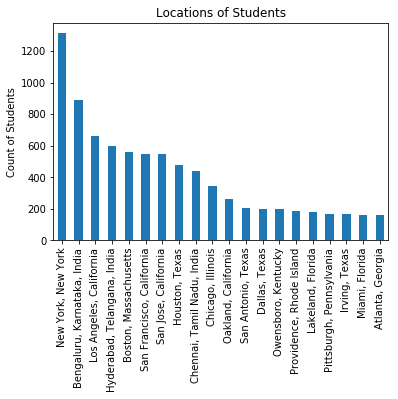

In [244]:
students_df.students_location.value_counts()[:20].plot.bar()
plt.title('Locations of Students')
plt.ylabel('Count of Students')
plt.show()

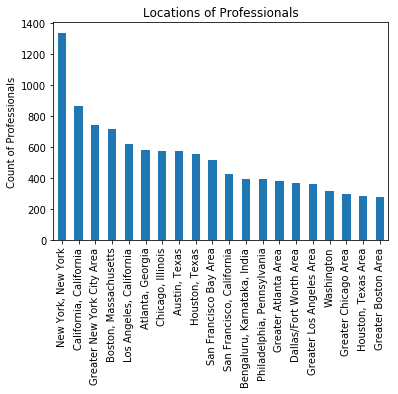

In [245]:
### Understand the geographical distribution of the professionals

professionals_df.professionals_location.value_counts()[:20].plot.bar()
plt.title('Locations of Professionals')
plt.ylabel('Count of Professionals')
plt.show()

### Examine Group memberships data frame

In [246]:
group_memberships.head()

,group_memberships_group_id,group_memberships_user_id
0,eabbdf4029734c848a9da20779637d03,9a5aead62c344207b2624dba90985dc5
1,eabbdf4029734c848a9da20779637d03,ea7122da1c7b4244a2184a4f9f944053
2,eabbdf4029734c848a9da20779637d03,cba603f34acb4a40b3ccb53fe6681b5d
3,eabbdf4029734c848a9da20779637d03,fa9a126e63714641ae0145557a390cab
4,eabbdf4029734c848a9da20779637d03,299da113c5d1420ab525106c242c9429


### Each group has several users

In [247]:
group_memberships.describe(include= ['O'])

,group_memberships_group_id,group_memberships_user_id
count,1038,1038
unique,46,727
top,f16d593910bf443598839021bbe97128,b0f6c44506444fb99e910dcc5836b5d8
freq,117,14


In [248]:
groups_df.head()

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program
3,37f002e8d5e442ca8e36e972eaa55882,youth program
4,52419ff84d4b47bebd0b0a6c1263c296,youth program


### Examine school membership id

In [249]:
school_memberships_df.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


### Examine Students data frame

In [250]:
students_df.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00


In [252]:
students_df.describe(include= ['O'])

,students_id,students_location
count,30971,28938
unique,30971,5480
top,8e76ea88049f4a39b1b5037ce3cd8f74,"New York, New York"
freq,1,1313
